## Assignment - 3
### Crime Investigators

Working with Crime Data
You must use Apache Spark for this assignment.
1. Create a Spark session
2. Define the schema for loading the Chicago crime dataset (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data).
3. Load the Chicago crime data (you should get more than a million rows).
4. Clean the data:
    - Remove all null values.
    - Change 'Date' column data type
5. Filter the data for last ten years.
6. Remove all the records with the following crime types:
    - 'NON-CRIMINAL (SUBJECT SPECIFIED)'
    - 'OTHER OFFENSE'
    - 'STALKING'
    - 'NON - CRIMINAL'
    - 'ARSON'
7. Merge the similar crime types.
    - For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.
8. Analyze the data and present results:
    - Show year-wise trend of the crime for last ten years.
    - Find out at which hour of the day crime is highest.
    - Find top ten crimes and present them as a bar chart

- **Importing required libraires**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a8b2cddb41baa2f901bbc5dbf40491f29b3c4ed955d11e7601a8a6b289e28d43
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DateType,BooleanType,DoubleType,TimestampType
import pyspark.sql.functions as F
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns

**1. Create a Spark session**

In [ ]:
spark = SparkSession.builder.appName('hw3').getOrCreate()

**2.Define the schema for loading the Chicago crime dataset (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data).**

In [ ]:
schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", StringType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

**3. Load the Chicago crime data (you should get more than a million rows.**

In [ ]:
df = spark.read.format("csv").option("header", True).schema(schema).load("/content/drive/MyDrive/Crimes_-_2001_to_Present.csv")

In [ ]:
df.show(5)

+--------+----------+--------------------+--------------------+----+------------------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+--------------------+--------+---------+--------+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|           UpdatedOn|Latitude|Longitude|Location|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+--------------------+--------+---------+--------+
|11037294|  JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|               BANK| false|   false|0111|     001|  42|           32|     11|       NULL|       NULL

In [ ]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (8026833, 22)


**4. Clean the data:**

**Remove all null values.**

In [ ]:
df = df.na.drop()

In [ ]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (7323525, 22)


**Change 'Date' column data type**

In [ ]:
df= df.withColumn("Date", to_timestamp(df.Date, "MM/dd/yyyy hh:mm:ss a"))

In [ ]:
df.limit(10).toPandas().head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3,35,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11,60,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7,46,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
3,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,15,67,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
4,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,16,68,04B,1170050.0,1863524.0,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,"(41.781002663, -87.652107119)"


In [ ]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (7323525, 22)


**5. Filter the data for last ten years.**

In [ ]:
df=df.filter((df['Year'] >=2013))

In [ ]:
df.limit(10).toPandas().head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3,35,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11,60,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7,46,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
3,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,15,67,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
4,12126129,JD321064,2020-08-04 20:28:00,081XX S LOOMIS BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,21,71,15,1168412.0,1850836.0,2020,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)"


In [ ]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (2843331, 22)


**6. Remove all the records with the following crime types:**
- 'NON-CRIMINAL (SUBJECT SPECIFIED)'
- 'OTHER OFFENSE'
- 'STALKING'
- 'NON - CRIMINAL'
- 'ARSON'

In [ ]:
df=df.filter((df['PrimaryType']!='NON-CRIMINAL (SUBJECT SPECIFIED)')&
             (df['PrimaryType']!='OTHER OFFENSE')&
             (df['PrimaryType']!='STALKING')&
             (df['PrimaryType']!='NON - CRIMINAL')&
             (df['PrimaryType']!='ARSON'))

In [ ]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (2655844, 22)


**7. Merge the similar crime types.**
- For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.

In [ ]:
df.select('PrimaryType').distinct().show(50,False)

+---------------------------------+
|PrimaryType                      |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|NON-CRIMINAL               

In [ ]:
df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'CRIM SEXUAL ASSAULT') | (df["PrimaryType"] == 'PROSTITUTION') ,
                                      'SEX OFFENSE').otherwise(df['PrimaryType']))

df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'WEAPONS VIOLATION') | (df["PrimaryType"] == 'INTERFERENCE WITH PUBLIC OFFICER') ,
                                      'PUBLIC PEACE VIOLATION').otherwise(df['PrimaryType']))

df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'LIQUOR LAW VIOLATION') | (df["PrimaryType"] == 'RITUALISM') | (df["PrimaryType"] == 'GAMBLING'),
                                      'OTHERS').otherwise(df['PrimaryType']))

df = df.withColumn("PrimaryType",when((df["PrimaryType"] == 'ROBBERY'),'THEFT').otherwise(df['PrimaryType']))

df = df.withColumn("PrimaryType", when(df["PrimaryType"] == 'OTHER NARCOTIC VIOLATION','NARCOTIC').otherwise(df['PrimaryType']))

In [ ]:
df.limit(10).toPandas().head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3,35,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11,60,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7,46,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
3,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,15,67,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
4,12126129,JD321064,2020-08-04 20:28:00,081XX S LOOMIS BLVD,143A,PUBLIC PEACE VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,21,71,15,1168412.0,1850836.0,2020,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)"


In [ ]:
print(f"Length of rows and cols : {((df.count()),len(df.columns))}")

Length of rows and cols : (2655844, 22)


**8. Analyze the data and present results:**

**Show year-wise trend of the crime for last ten years.**

In [ ]:
df = df.withColumn('Year',year(df.Date))
df.limit(10).toPandas().head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3,35,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11,60,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7,46,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
3,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,15,67,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
4,12126129,JD321064,2020-08-04 20:28:00,081XX S LOOMIS BLVD,143A,PUBLIC PEACE VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,21,71,15,1168412.0,1850836.0,2020,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)"


In [ ]:
df_y = df.groupBy('Year').count().sort(desc("count"))
df_y.show(5)

+----+------+
|Year| count|
+----+------+
|2013|287826|
|2014|256125|
|2016|248594|
|2017|246567|
|2018|245385|
+----+------+
only showing top 5 rows



In [ ]:
d_y = df_y.toPandas()

Text(0.5, 1.0, 'Trend of crimes for last 10 years')

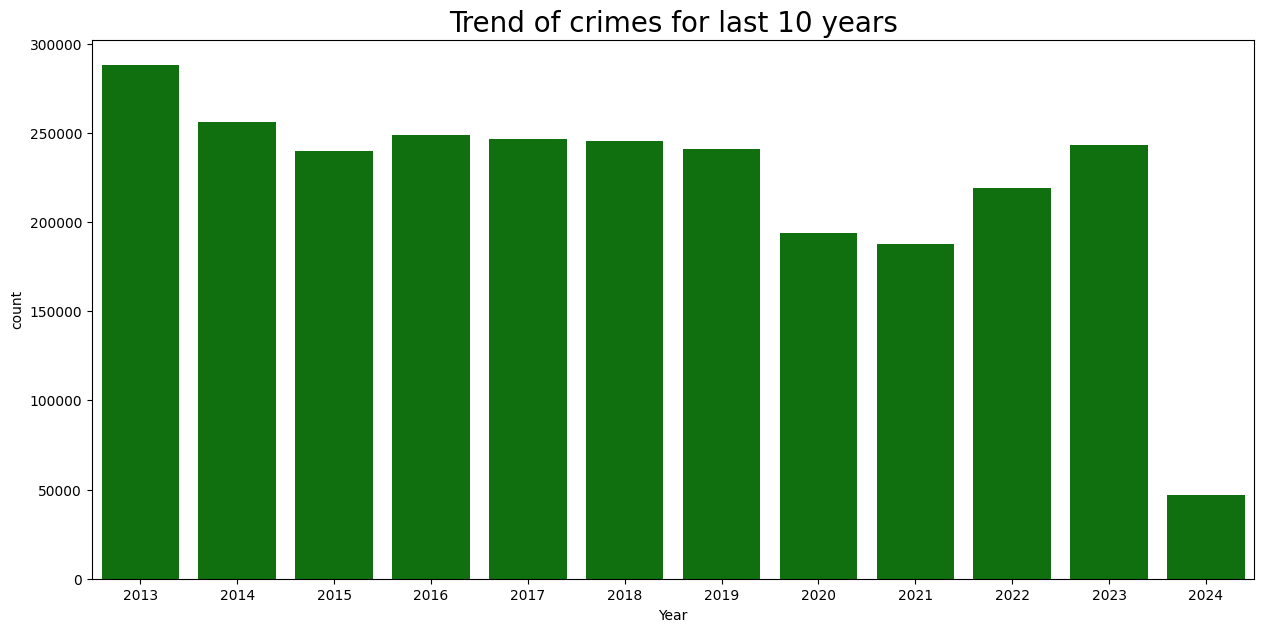

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Year',y = 'count',data = d_y,color= "Green")
plt.title("Trend of crimes for last 10 years", size = 20)

**Find out at which hour of the day crime is highest.**

In [ ]:
df = df.withColumn('Hour',hour(df.Date))
df.limit(10).toPandas().head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location,Hour
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,35,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)",10
1,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,60,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)",5
2,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,46,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)",10
3,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,67,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)",23
4,12126129,JD321064,2020-08-04 20:28:00,081XX S LOOMIS BLVD,143A,PUBLIC PEACE VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,71,15,1168412.0,1850836.0,2020,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)",20


In [ ]:
df_h = df.groupBy('Hour').count().sort(desc("count"))
df_h.show(1)

+----+------+
|Hour| count|
+----+------+
|  12|153406|
+----+------+
only showing top 1 row



- Hour "12" has highest crime rate

In [ ]:
d_h = df_h.toPandas()

Text(0.5, 1.0, 'Most crime happend Hour')

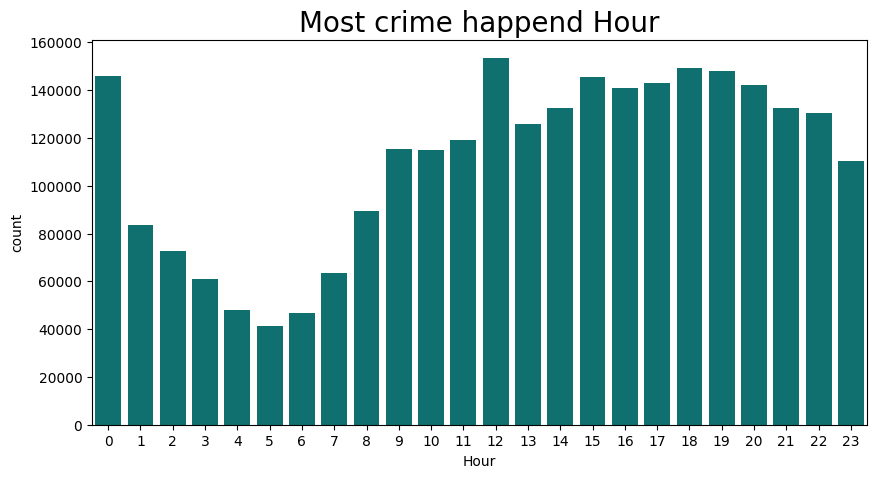

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Hour',y = 'count',data = d_h,color= "Teal")
plt.title("Most crime happend Hour", size = 20)

**Find top ten crimes and present them as a bar chart**

In [ ]:
df_t = df.groupBy('PrimaryType').count().sort(desc("count"))
df_t.show(5)



+------------------+------+
|       PrimaryType| count|
+------------------+------+
|             THEFT|751621|
|           BATTERY|526315|
|   CRIMINAL DAMAGE|313690|
|           ASSAULT|217086|
|DECEPTIVE PRACTICE|174485|
+------------------+------+
only showing top 5 rows



In [ ]:
d_t = df_t.toPandas()

In [ ]:
d_t = d_t.head(10)

Text(0.5, 1.0, 'Top 10 Crime types')

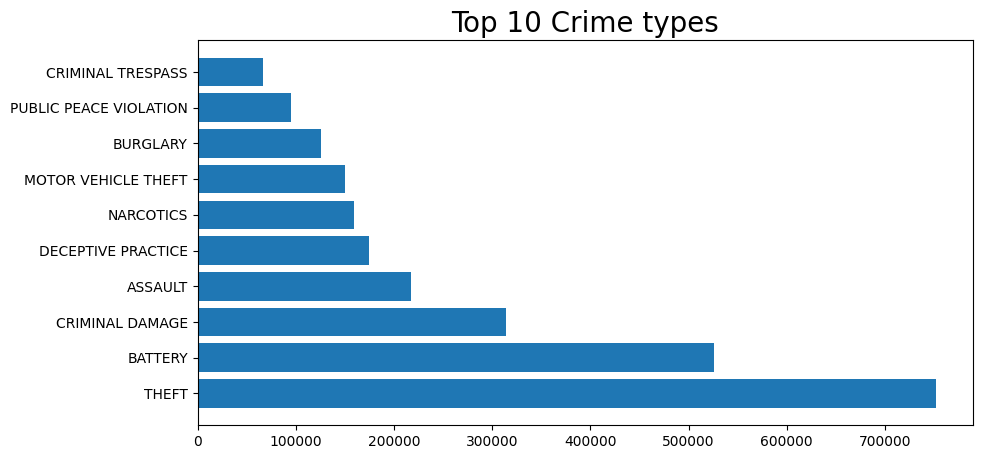

In [ ]:
plt.figure(figsize=(10,5))
#sns.barplot(x = 'PrimaryType',y = 'count',data = d_t,color= "Blue")
plt.barh(d_t['PrimaryType'],d_t['count'])
plt.title("Top 10 Crime types", size = 20)